In [2]:
# -*- coding: utf-8 -*-
# <nbformat>3.0</nbformat>

# <codecell>

# coding: utf-8
%matplotlib inline
import matplotlib
import scipy.integrate
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc ## desnecessário
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams.update({'font.size': 18})

plt.figure(figsize=(10,8))

#Discretização
M = 101 #espaço
N = 10000 #tempo
Tmax = 1000.0

In [3]:
t = np.linspace(0,Tmax,N)
x = np.sin(t*2*np.pi) + np.sin(3*t*2*np.pi)

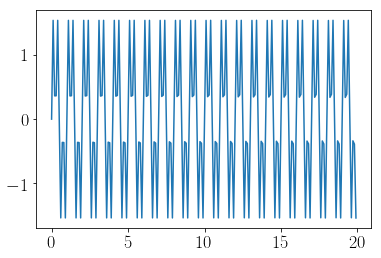

In [4]:
plt.plot(t[:200],x[:200])

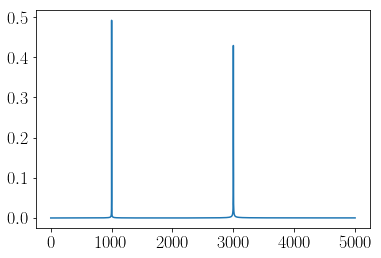

In [5]:
xf = np.fft.rfft(x)
plt.plot(np.abs(xf)/len(x))

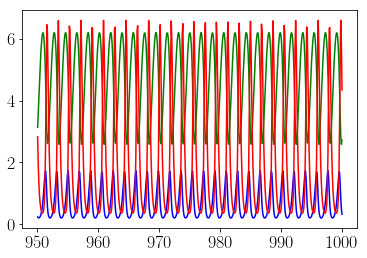

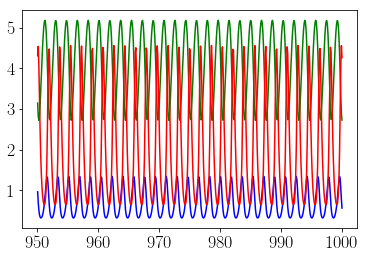

In [38]:
#Direto do arquivo
#plt.figure(figsize=(10,8))
Nlvar = 100
Nlnum = 100
Lvar = [0.5 + 0.0125*j for j in range(0,Nlvar)]
Lnum = [0.5 + 0.0125*j for j in range(0,Nlnum)]

l = 0.5 + 35*0.0125

mu = 15
t = np.linspace(0,Tmax,N)
m = 1.0
gamma = 0.5
alpha = 1
beta = 8
phi = 1.0
D = [[1.0,5.0,1.0]]
t = np.linspace(0,Tmax,N)

#Var

sol = np.load('Var_Method_IGP_l = %.3f,DR=%.3f,D1=%.3f,D2=%.3f,mu=%.3f,gamma=%.3f,beta =%.3f.npy'
        % (l,DR,D1,D2,mu,gamma,beta))

B1B2 = sol[:,0]
A1 = sol[:,1]
A2 = sol[:,2]
plt.plot(t[-500:],B1B2[-500:], color = 'green')
plt.plot(t[-500:],A1[-500:], color = 'blue')
plt.plot(t[-500:],A2[-500:], color = 'red')
plt.show()


#NumInt

sol = np.load('Method_Of_LinesIGP_l = %.3f,DR=%.3f,D1=%.3f,D2=%.3f,mu=%.3f,gamma=%.3f,beta =%.3f.npy'
        % (l,DR,D1,D2,mu,gamma,beta))

R = np.transpose(sol[:,0:M])
C1 = np.transpose(sol[:,M:2*M])
C2 = np.transpose(sol[:,2*M:])
plt.plot(t[-500:],R[M/2,-500:],color = 'green')
plt.plot(t[-500:],C1[M/2,-500:],color = 'blue')
plt.plot(t[-500:],C2[M/2,-500:],color = 'red')
R = R[M/2,:]
C1 = C1[M/2,:]
C2 = C2[M/2,:]

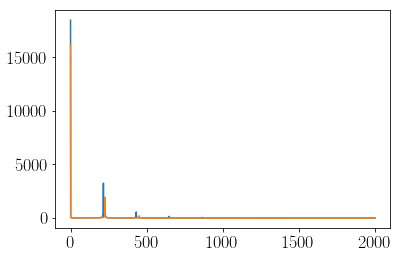

In [39]:
#TF-Var
B1B2f = np.fft.rfft(B1B2)
A1f = np.fft.rfft(A1)
A2f = np.fft.rfft(A2)
plt.plot(np.abs(B1B2f))

#TF-Numerico
Rf = np.fft.rfft(R)
C1f = np.fft.rfft(C1)
C2f = np.fft.rfft(C2)
plt.plot(np.abs(Rf))

(4000,)